In [1]:
# Import necessary libraries
import pandas as pd  # Importing Pandas for data manipulation
import numpy as np   # Importing NumPy for numerical operations
from sklearn import preprocessing  # Importing Scikit-Learn's preprocessing module
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization
plt.rc("font", size=14)  # Setting the font size for Matplotlib
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression model
from sklearn.model_selection import train_test_split  # Importing train-test split function
import seaborn as sns  # Importing Seaborn for advanced data visualization
sns.set(style="white")  # Setting Seaborn's style to white background
sns.set(style="whitegrid", color_codes=True)  # Setting Seaborn's style for white grid and color codes


In [2]:
df_loan = pd.read_csv(r'D:\2.1_codebase\1_Datasets\loan_data_2007_2014.csv')

C:\Users\tharu\AppData\Local\Temp\ipykernel_30556\3421401922.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv(r'D:\2.1_codebase\1_Datasets\loan_data_2007_2014.csv')


In [3]:
# Display the count of unique values in the 'loan_status' column
df_loan['loan_status'].value_counts()


loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [4]:
# Create a filter to select rows with loan statuses 'Fully Paid', 'Charged Off', or 'Default'
loan_filter = df_loan['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])

# Apply the filter to the DataFrame to keep only the selected loan statuses
df_loan = df_loan[loan_filter]

# Display the count of unique values in the 'loan_status' column after filtering
df_loan['loan_status'].value_counts()


loan_status
Fully Paid     184739
Charged Off     42475
Default           832
Name: count, dtype: int64

In [5]:
# Define a function to create the 'Late_Loan' target variable
def CreateTarget(status):
    if status == 'Fully Paid':
        return 0
    else:
        return 1

# Apply the function to the 'loan_status' column and create the 'Late_Loan' column
df_loan['Late_Loan'] = df_loan['loan_status'].map(CreateTarget)

# Display the count of unique values in the 'Late_Loan' column
df_loan['Late_Loan'].value_counts()


Late_Loan
0    184739
1     43307
Name: count, dtype: int64

In [6]:
# Check for features with more than 10% missing values
features_missing_series = df_loan.isnull().sum() > len(df_loan) / 10

# Create a list of features with more than 10% missing values
features_missing_list = features_missing_series[features_missing_series == True].index.tolist()

# Drop the features with more than 10% missing values from df_loan and create df_loan_1
df_loan_1 = df_loan.drop(features_missing_list, axis=1)

# Print the shape (number of rows and columns) of df_loan_1
df_loan_1.shape


(228046, 50)

In [7]:
df_loan.shape

(228046, 75)

In [7]:
# Drop specified columns from df_loan_1
df_loan_1 = df_loan_1.drop(['id', 'member_id', 'loan_status', 'url', 'zip_code', 'policy_code', 'application_type',
                            'last_pymnt_d', 'last_credit_pull_d', 'verification_status', 'pymnt_plan', 'funded_amnt',
                            'funded_amnt_inv', 'sub_grade', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_pymnt',
                            'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
                            'collection_recovery_fee', 'last_pymnt_amnt', 'initial_list_status', 'earliest_cr_line'], axis=1)

# Fill missing values in 'emp_length', 'emp_title', 'title', 'revol_util', and 'collections_12_mths_ex_med'
df_loan_1['emp_length'].fillna('Unknown', inplace=True)
df_loan_1['emp_title'].fillna('Unknown', inplace=True)
df_loan_1['title'].fillna('Unknown', inplace=True)
df_loan_1['revol_util'].fillna(df_loan_1['revol_util'].mean(), inplace=True)
df_loan_1['collections_12_mths_ex_med'].fillna(df_loan_1['collections_12_mths_ex_med'].mean(), inplace=True)

# Check for missing values in df_loan_1
df_loan_1.isnull().sum()


loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
issue_d                       0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
collections_12_mths_ex_med    0
acc_now_delinq                0
Late_Loan                     0
dtype: int64

In [8]:
# Import necessary libraries and modules for data analysis and processing

# Import the algorithms module from pandas for data manipulation and computation
import pandas.core.algorithms as algos

# Import the Series class from pandas, which is used for handling one-dimensional labeled data
from pandas import Series

# Import statistical functions and tests from the SciPy library
from scipy import stats

# Import the regular expressions module for pattern matching and string manipulation
import re

# Import the traceback module for extracting information about exceptions and errors
import traceback

# Import the string module, which provides constants and functions for string manipulation
import string


In [9]:
# Set the maximum number of bins and a force bin value
max_bin = 20
force_bin = 3

# Define a binning function called mono_bin
def mono_bin(Y, X, n = max_bin):
    """
    Perform monotonic binning of a numerical variable X based on the target variable Y.
    Args:
        Y (pandas Series): The target variable.
        X (pandas Series): The numerical variable to be binned.
        n (int): The maximum number of bins.
    Returns:
        pandas DataFrame: Binned data including various statistics.
    """
    
    # Create a DataFrame containing X and Y
    df1 = pd.DataFrame({"X": X, "Y": Y})
    
    # Separate rows with missing X values and those with non-missing X values
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    
    # Initialize a correlation coefficient
    r = 0
    
    # Loop to find the best binning by reducing the number of bins
    while np.abs(r) < 1:
        try:
            # Create bins using quantiles of non-missing X values
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            
            # Group data by buckets
            d2 = d1.groupby('Bucket', as_index=True)
            
            # Calculate Spearman's rank correlation coefficient between mean X and mean Y in each bucket
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            
            # Reduce the number of bins by one
            n = n - 1 
        except Exception as e:
            n = n - 1
        
    # If only one bin is created, apply a forced binning
    if len(d2) == 1:
        n = force_bin         
        # Create bins based on quantiles with a forced number of bins
        bins = notmiss.X.quantile(np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        # Create bins using the defined quantiles
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    # Create an empty DataFrame to store the binning results
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)

    # If there are rows with missing values in X, add a separate row for them
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = pd.concat([d3, d4], ignore_index=True)

    # Calculate various statistics and information value (IV) for each bin
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    
    # Add a variable name column
    d3["VAR_NAME"] = "VAR"
    
    # Reorder and select relevant columns
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    
    # Replace infinite values in the IV column with 0
    d3 = d3.replace([np.inf, -np.inf], 0)
    
    # Sum IV values to get the overall IV for the variable
    d3.IV = d3.IV.sum()
    
    # Return the binning results
    return d3

# Define a function called char_bin for binning categorical variables
def char_bin(Y, X):
    """
    Perform binning of a categorical variable X based on the target variable Y.
    Args:
        Y (pandas Series): The target variable.
        X (pandas Series): The categorical variable to be binned.
    Returns:
        pandas DataFrame: Binned data including various statistics.
    """
    
    # Create a DataFrame containing X and Y
    df1 = pd.DataFrame({"X": X, "Y": Y})
    
    # Separate rows with missing X values and those with non-missing X values
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X', as_index=True)
    
    # Create an empty DataFrame to store the binning results
    d3 = pd.DataFrame({}, index=[])
    
    # Calculate counts and other statistics for each category
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    # If there are rows with missing values in X, add a separate row for them
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE': np.nan}, index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = pd.concat([d3, d4], ignore_index=True)

    # Calculate various statistics and information value (IV) for each category
    d3["EVENT_RATE"] = d3.EVENT / d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT / d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT / d3['EVENT'].sum()
    d3["DIST_NON_EVENT"] = d3.NONEVENT / d3['NONEVENT'].sum()
    d3["WOE"] = np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT - d3.DIST_NON_EVENT) * np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    
    # Reorder and select relevant columns
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    
    # Replace infinite values in the IV column with 0
    d3 = d3.replace([np.inf, -np.inf], 0)
    
    # Sum IV values to get the overall IV for the variable
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return d3

# Define a function called data_vars to calculate IV for all variables
def data_vars(df1, target):
    """
    Calculate the Information Value (IV) for all variables in a DataFrame.
    Args:
        df1 (pandas DataFrame): The DataFrame containing variables.
        target (pandas Series): The target variable.
    Returns:
        pandas DataFrame: IV values for all variables.
    """
    
    # Extract the name of the calling variable
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    # Get the names of all variables in the DataFrame
    x = df1.dtypes.index
    count = -1
    
    # Loop through each variable and calculate IV
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1

            # Reinitialize DataFrame 
            if count == 0:
                iv_df = pd.DataFrame(conv)
            else: 
                iv_df = pd.concat([iv_df, pd.DataFrame(conv)], ignore_index=True)
    
    # Calculate the overall IV for each variable
    iv = pd.DataFrame({'IV': iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    
    return iv_df, iv


In [11]:
# Calculate Information Value (IV) for all variables in df_loan_2 with respect to the Late_Loan target variable.
# IV is a statistical measure used to assess the predictive power of each variable in relation to the target.
# It quantifies the strength of the relationship between a variable and the target: a higher IV indicates a stronger relationship.
# IV is a crucial metric in feature selection for credit risk modeling.
final_iv, IV = data_vars(df_loan_1, df_loan_1.Late_Loan)


C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

In [14]:
final_iv

VAR_NAME MIN_VALUE MAX_VALUE   COUNT  EVENT  \
0                        loan_amnt       500      6000   44984   7202   
1                        loan_amnt      6025      9000   33317   5608   
2                        loan_amnt      9025     12000   46414   8323   
3                        loan_amnt     12025     15250   27486   5128   
4                        loan_amnt     15275     21000   39505   8449   
...                            ...       ...       ...     ...    ...   
173535                   total_acc      39.0     150.0   28462   4955   
173536  collections_12_mths_ex_med       0.0       1.0  227971  43295   
173537  collections_12_mths_ex_med       2.0       6.0      75     12   
173538              acc_now_delinq       0.0       1.0  228014  43298   
173539              acc_now_delinq       2.0       5.0      32      9   

        EVENT_RATE  NONEVENT  NON_EVENT_RATE  DIST_EVENT  DIST_NON_EVENT  \
0         0.160101     37782        0.839899    0.166301        0.204516   
1         0.168322     27709        0.831678    0.129494        0.149990   
2         0.179321     38091        0.820679    0.192186        0.206188   
3         0.186568     22358        0.813432    0.118410        0.121025   
4         0.213872     31056        0.786128    0.195095        0.168107   
...            ...       ...             ...         ...             ...   
173535    0.174092     23507        0.825908    0.114416        0.127244   
173536    0.189915    184676        0.810085    0.999723        0.999659   
173537    0.160000        63        0.840000    0.000277        0.000341   
173538    0.189892    184716        0.810108    0.999792        0.999876   
173539    0.281250        23        0.718750    0.000208        0.000124   

             WOE        IV  
0      -0.206844  0.029465  
1      -0.146933  0.029465  
2      -0.070326  0.029465  
3      -0.021839  0.029465  
4       0.148886  0.029465  
...          ...       ...  
173535 -0.106271  0.004954  
173536  0.000064  0.000013  
173537 -0.207598  0.000013  
173538 -0.000083  0.000043  
173539  0.512360  0.000043  

[173540 rows x 12 columns]

In [16]:
IV.sort_values('IV')

VAR_NAME        IV
3   collections_12_mths_ex_med  0.000013
0               acc_now_delinq  0.000043
16                     pub_rec  0.000366
18                   revol_bal  0.001634
4                  delinq_2yrs  0.001974
15                    open_acc  0.002020
22                   total_acc  0.004954
6                   emp_length  0.011041
10              inq_last_6mths  0.013938
9               home_ownership  0.016074
1                   addr_state  0.016225
11                 installment  0.018642
17                     purpose  0.026470
14                   loan_amnt  0.029465
13                     issue_d  0.043451
2                   annual_inc  0.058464
19                  revol_util  0.062209
5                          dti  0.089368
21                       title  0.123106
20                        term  0.156057
7                    emp_title  0.227179
8                        grade  0.390450
12                    int_rate  0.421569

In [17]:
IV.to_csv(r'D:\2.1_codebase\credit_risk_modelling\iv.csv')

In [19]:
# Create a list of column names to be transformed. Exclude 'Late_Loan', which is the target variable.
transform_vars_list = df_loan_1.columns.difference(['Late_Loan'])

# Define a prefix to be added to the names of new columns created during transformation.
# Leaving it blank ('') indicates that the original column values will be replaced.
transform_prefix = 'new_'  # Leave this value blank if you want to replace original column values.


In [21]:
# Assign the DataFrame 'df_loan_1' to 'df' for easier reference
df=df_loan_1
df.head()

loan_amnt        term  int_rate  installment grade             emp_title  \
0       5000   36 months     10.65       162.87     B               Unknown   
1       2500   60 months     15.27        59.83     C                 Ryder   
2       2400   36 months     15.96        84.33     C               Unknown   
3      10000   36 months     13.49       339.31     C   AIR RESOURCES BOARD   
5       5000   36 months      7.90       156.46     A  Veolia Transportaton   

  emp_length home_ownership  annual_inc issue_d  ... delinq_2yrs  \
0  10+ years           RENT     24000.0  Dec-11  ...         0.0   
1   < 1 year           RENT     30000.0  Dec-11  ...         0.0   
2  10+ years           RENT     12252.0  Dec-11  ...         0.0   
3  10+ years           RENT     49200.0  Dec-11  ...         0.0   
5    3 years           RENT     36000.0  Dec-11  ...         0.0   

  inq_last_6mths open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0            1.0      3.0      0.0      13648        83.7        9.0   
1            5.0      3.0      0.0       1687         9.4        4.0   
2            2.0      2.0      0.0       2956        98.5       10.0   
3            1.0     10.0      0.0       5598        21.0       37.0   
5            3.0      9.0      0.0       7963        28.3       12.0   

   collections_12_mths_ex_med  acc_now_delinq  Late_Loan  
0                         0.0             0.0          0  
1                         0.0             0.0          1  
2                         0.0             0.0          0  
3                         0.0             0.0          0  
5                         0.0             0.0          0  

[5 rows x 24 columns]

In [22]:
# Function to transform numeric variables based on a predefined mapping
def transform_numeric(x, transform_dict):
    for key, value in sorted(transform_dict.items(), reverse=True):
        if x <= key:
            return value
    return 0

# Function to transform categorical variables based on a predefined mapping
def transform_categorical(x, transform_dict):
    return transform_dict.get(x, 0)

# Loop through each variable in the list of variables to be transformed
for var in transform_vars_list:
    # Create a subset DataFrame containing only rows for the current variable
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    
    # Create a transformation dictionary from the MAX_VALUE and WOE columns of the subset
    transform_dict = dict(zip(small_df.MAX_VALUE, small_df.WOE))

    # Print information about the transformation being performed
    print(f"Transforming variable: {var}")
    print(f"Transformation dictionary: {transform_dict}")

    # Check if the variable is categorical (object type) or numeric
    if df[var].dtype == 'O':  # object type, typically indicating a string or categorical variable
        # Apply the transformation to the variable and create a new column with a prefix
        df[transform_prefix + var] = df[var].map(lambda x: transform_categorical(x, transform_dict))
    else:  # numeric variable
        # Apply the transformation to the variable and create a new column with a prefix
        df[transform_prefix + var] = df[var].map(lambda x: transform_numeric(x, transform_dict))

# Display the first few rows of the DataFrame 'df' with the transformed variables
print(df.head())


Transforming variable: acc_now_delinq
Transformation dictionary: {1.0: -8.333247373942804e-05, 5.0: 0.5123600947840294}
Transforming variable: addr_state
Transformation dictionary: {'AK': -0.28655363461461963, 'AL': 0.18186642353515045, 'AR': 0.09233097974649596, 'AZ': -0.03246475070840943, 'CA': -0.062239238795393614, 'CO': -0.2737503037119205, 'CT': -0.12183152146914769, 'DC': -0.6657709298401009, 'DE': 0.06647441050581844, 'FL': 0.15059638072696704, 'GA': -0.06322125073857286, 'HI': 0.05955753230335587, 'IA': -0.1588081790571408, 'ID': -0.1588081790571408, 'IL': -0.09232690085337626, 'IN': 0.3136812959653028, 'KS': -0.09712559598431443, 'KY': 0.10341458598790348, 'LA': 0.094718639506706, 'MA': -0.09233229857934343, 'MD': 0.03609215994367399, 'ME': 0.0, 'MI': 0.11176406582817988, 'MN': 0.002227591822082784, 'MO': 0.10010259611569992, 'MS': 0.44864428039792165, 'MT': -0.3463790917372392, 'NC': 0.07221022365393254, 'NE': 1.7383118058287403, 'NH': -0.28322169678863696, 'NJ': 0.080876358

In [23]:
df['new_grade'].value_counts()

new_grade
-0.428962    70268
 0.125666    57997
-1.206614    39012
 0.487693    36049
 0.857435    16409
 1.084121     6649
 1.238040     1662
Name: count, dtype: int64

In [24]:
df['grade'].value_counts()

grade
B    70268
C    57997
A    39012
D    36049
E    16409
F     6649
G     1662
Name: count, dtype: int64

In [25]:
# Create the target variable 'y' which represents whether a loan is late (1) or not (0)
y = df['Late_Loan']

# Calculate the mean of the target variable 'y' (proportion of late loans)
y_mean = y.mean()

# Define a list of features to be used in the modeling
features = [
    'new_addr_state',
    'new_annual_inc',
    'new_delinq_2yrs',
    'new_dti',
    'new_emp_length',
    'new_grade',
    'new_home_ownership',
    'new_inq_last_6mths',
    'new_int_rate',
    'new_issue_d',
    'new_loan_amnt',
    'new_open_acc',
    'new_purpose',
    'new_revol_util',
    'new_term'
]

# Create the feature matrix 'X' using the selected features
X = df[features]


In [26]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [28]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression  # Import logistic regression model
from sklearn.tree import DecisionTreeClassifier  # Import decision tree classifier
from sklearn import metrics  # Import metrics for model evaluation

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the logistic regression model on the training data
logreg.fit(X_train, y_train)

# Create a decision tree classifier model
dtree = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=5, min_samples_leaf=5)

# Fit the decision tree classifier model on the training data
dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [39]:
# Generate predictions using the logistic regression model on the test set
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix with the true 'y' values and predicted 'y' values
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(confusion_matrix_result)


[[55263   260]
 [12628   263]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [228046, 68414]

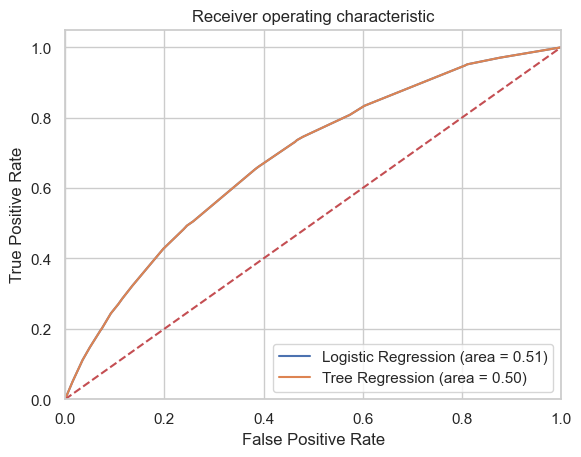

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
tree_roc_auc=roc_auc_score(y_test, dtree.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Tree Regression (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()